In [1]:
import os
from dotenv import load_dotenv

import ee
import geemap
import colorcet
import requests
from google.cloud import storage
import streamlit as st

load_dotenv()

True

In [2]:
cloud_project = os.getenv("GOOGLE_CLOUD_PROJECT_NAME")
key_path = os.getenv("GOOGLE_APPLICATION_CREDENTIALS")
os.environ["GDAL_DISABLE_READDIR_ON_OPEN"] = "YES"
os.environ["CPL_VSIL_CURL_ALLOWED_EXTENSIONS"] = "tif"

In [3]:
print(key_path)

/home/nissim/hotspotstoplight-4917b8aa52a9.json


In [30]:
def list_tifs_in_bucket(bucket_name, prefix=''):
    """Lists all the .tif files in the bucket that include 'top_cluster_index' in their names."""
    # Create a client to interact with Google Cloud Storage
    client = storage.Client()
    bucket = client.bucket(bucket_name)

    # Create an empty list to hold the URLs of the .tif files
    tif_urls = []

    # List all blobs in the specified bucket with the prefix
    blobs = client.list_blobs(bucket, prefix=prefix)
    for blob in blobs:
        if blob.name.endswith('.tif') and 'top_cluster_idx_cog' in blob.name:
            tif_url = f"gs://{bucket_name}/{blob.name}"
            tif_urls.append(tif_url)

    return tif_urls

# Set the bucket name
bucket_name = 'hotspotstoplight-sanjose-ui'

# Get the URLs of the TIF files
tif_urls = list_tifs_in_bucket(bucket_name)
print(tif_urls)


['gs://hotspotstoplight-sanjose-ui/bio_top_cluster_idx_cog.tif', 'gs://hotspotstoplight-sanjose-ui/clim_top_cluster_idx_cog.tif', 'gs://hotspotstoplight-sanjose-ui/urb_top_cluster_idx_cog.tif', 'gs://hotspotstoplight-sanjose-ui/urbex_top_cluster_idx_cog.tif']


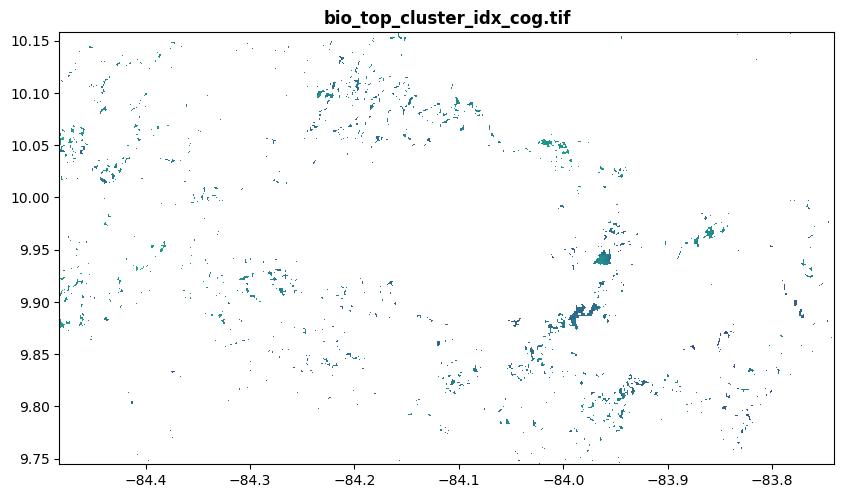

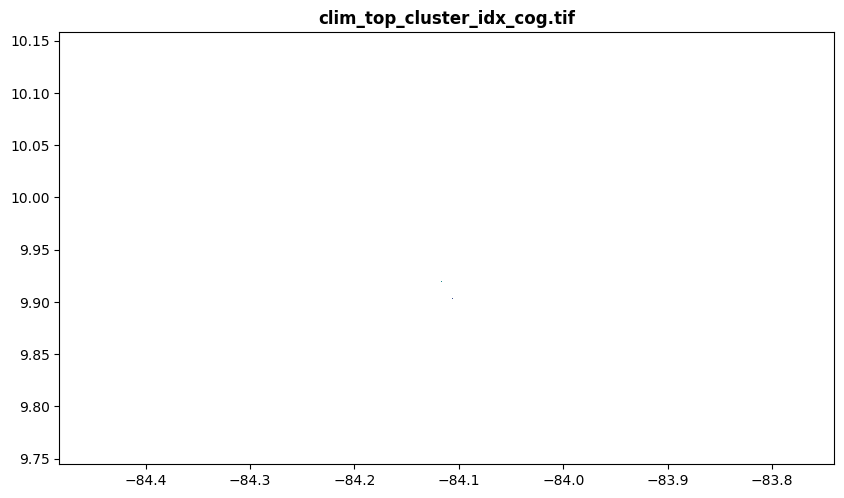

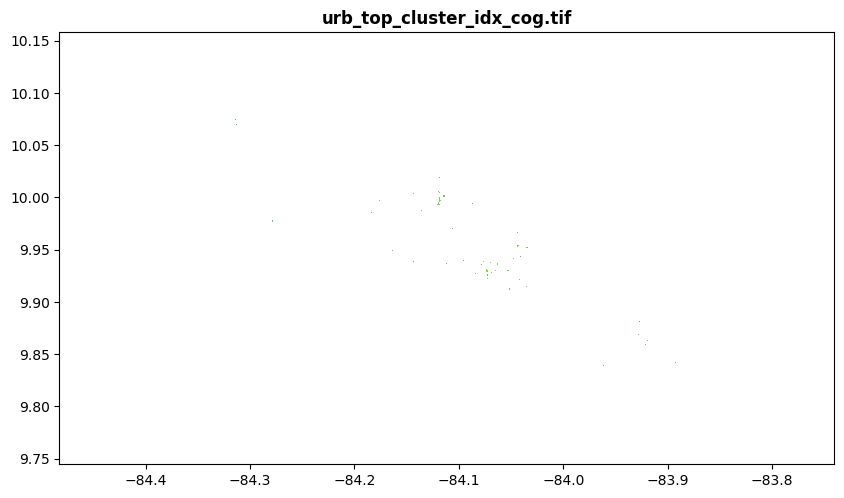

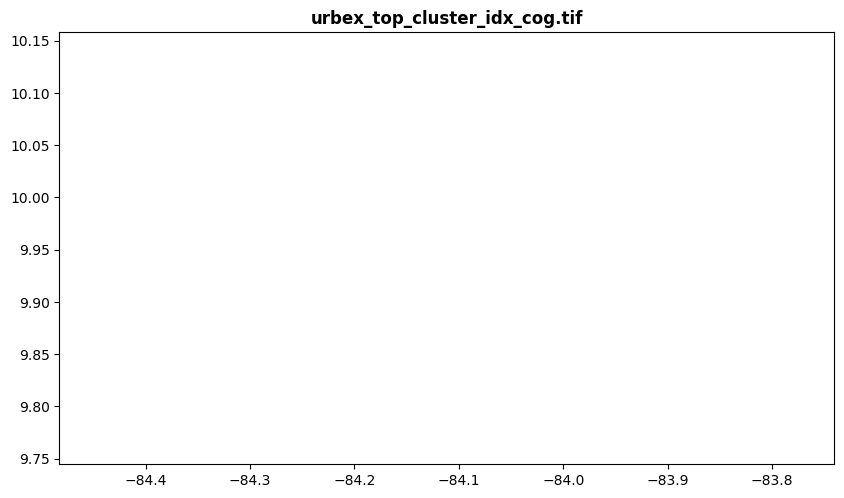

In [31]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

def plot_cog(url):
    with rasterio.open(url) as src:
        fig, ax = plt.subplots(figsize=(10, 10))
        show(src, ax=ax, title=url.split('/')[-1])
        plt.show()

for url in tif_urls:
    plot_cog(url)

In [6]:
import geemap
import colorcet

In [27]:
print(tif_urls[0])

gs://hotspotstoplight-sanjose-ui/bio_top_cluster_idx_cog.tif


In [19]:
ee.Authenticate()


Successfully saved authorization token.


In [20]:
ee.Initialize(project=cloud_project)

In [36]:
bio = geemap.load_GeoTIFF("gs://hotspotstoplight-sanjose-ui/bio_top_cluster_idx_cog.tif")
clim = geemap.load_GeoTIFF("gs://hotspotstoplight-sanjose-ui/clim_top_cluster_idx_cog.tif")

In [37]:

URL = 'gs://hotspotstoplight_floodmapping/data/costa_rica/outputs/flood_prob.tif'
image = geemap.load_GeoTIFF(URL)

Map = geemap.Map()

vizParamsBio = {
    'min': 0,
    'max': 1,
    'palette': colorcet.rainbow #bmw # ['white', 'pink']#
}

vizParamsClim = {
    'min': 0,
    'max': 1,
    'palette': colorcet.fire
}

Map.add_basemap('Esri.WorldImagery')
Map.addLayer(bio, vizParamsBio, "bio")
Map.addLayer(clim, vizParamsClim, "clim")
# Map.addLayer(image, vizParamsProbability, "Flood Prob")
Map.add_basemap('CartoDB.PositronOnlyLabels')
Map.centerObject(bio, 11)
Map

Map(center=[9.951376990163025, -84.11152188060854], controls=(WidgetControl(options=['position', 'transparent_…